<a href="https://colab.research.google.com/github/Sakethra/Doctor_visit_analysis/blob/main/doctor_visit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read the dataset and display

In [ ]:
df = pd.read_csv(r"/DoctorVisits - DA.csv")

In [ ]:
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no


# Data cleaning

# converting values of age and income

In [ ]:
df["age"]=df["age"]*100
df["income"]=df["income"]*10000

In [ ]:
df

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19.0,5500.0,1,4,1,yes,no,no,no,no
1,2,1,female,19.0,4500.0,1,2,1,yes,no,no,no,no
2,3,1,male,19.0,9000.0,3,0,0,no,no,no,no,no
3,4,1,male,19.0,1500.0,1,0,0,no,no,no,no,no
4,5,1,male,19.0,4500.0,2,5,1,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,22.0,5500.0,0,0,0,no,no,no,no,no
5186,5187,0,male,27.0,13000.0,0,0,1,no,no,no,no,no
5187,5188,0,female,37.0,2500.0,1,0,1,no,no,yes,no,no
5188,5189,0,female,52.0,6500.0,0,0,0,no,no,no,no,no


# removing zero value in income, visits, illness

In [ ]:
df = df[df['income'] != 0]
df = df[df['visits'] != 0]
df = df[df['illness'] != 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 1017
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  933 non-null    int64  
 1   visits      933 non-null    int64  
 2   gender      933 non-null    object 
 3   age         933 non-null    float64
 4   income      933 non-null    float64
 5   illness     933 non-null    int64  
 6   reduced     933 non-null    int64  
 7   health      933 non-null    int64  
 8   private     933 non-null    object 
 9   freepoor    933 non-null    object 
 10  freerepat   933 non-null    object 
 11  nchronic    933 non-null    object 
 12  lchronic    933 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 102.0+ KB


# Data visualisation

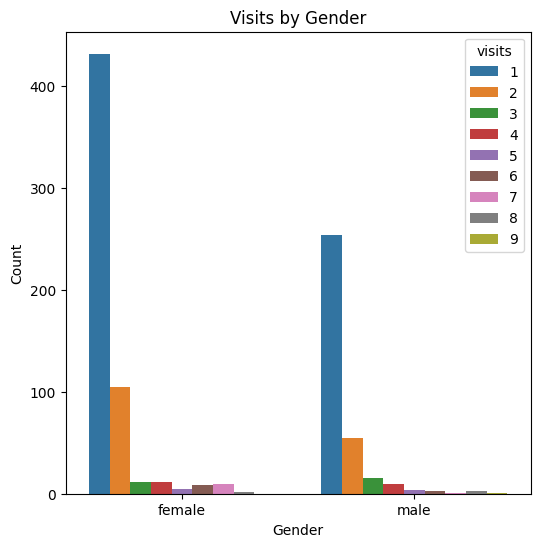

In [ ]:
#bar plot for visits by gender
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='gender', hue='visits')
plt.title('Visits by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


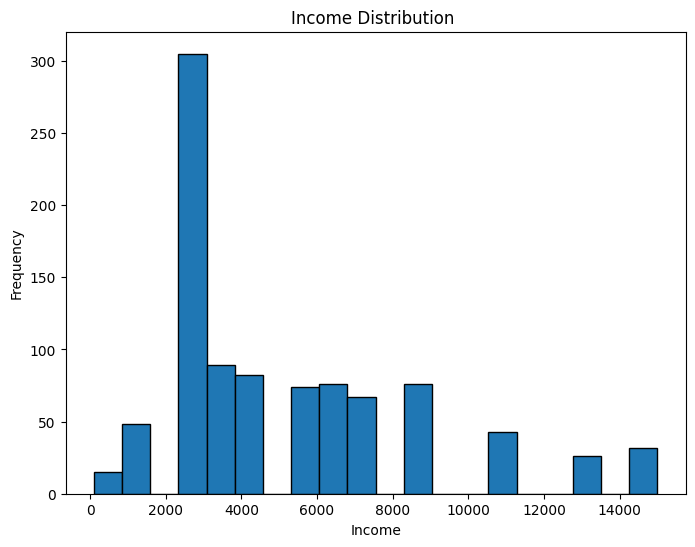

In [ ]:
#Histogram for income
plt.figure(figsize=(8, 6))
plt.hist(df['income'], bins=20, edgecolor='k')
plt.title('Income Distribution ')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

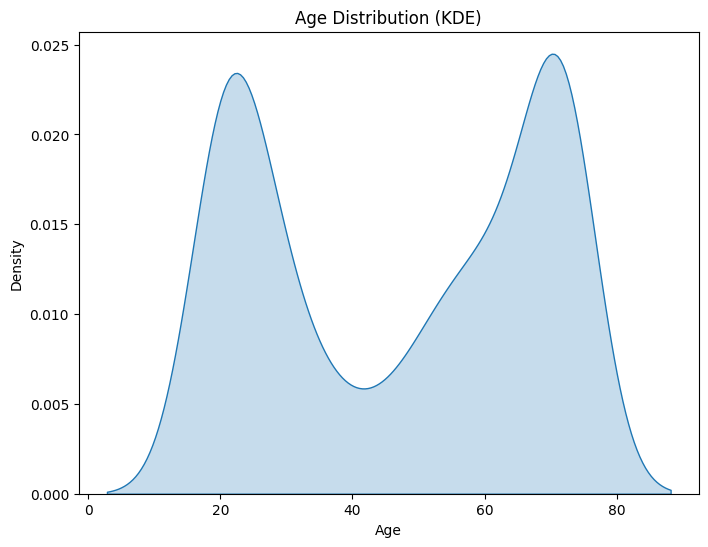

In [ ]:
# KDE for age distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(df['age'], fill=True)
plt.title('Age Distribution (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

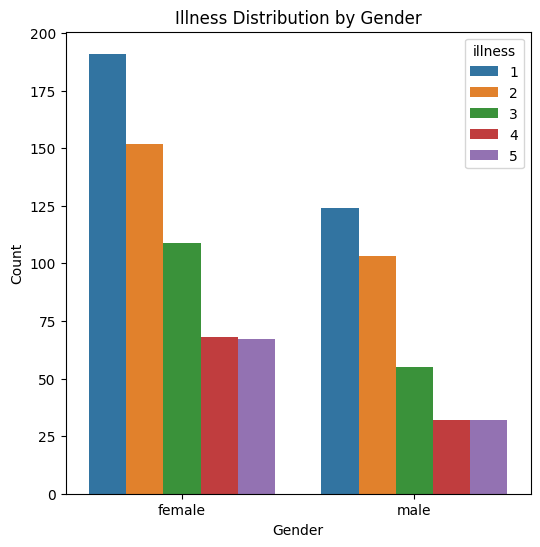

In [ ]:
#bar plot for illness distribution by gender
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='gender', hue='illness')
plt.title('Illness Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

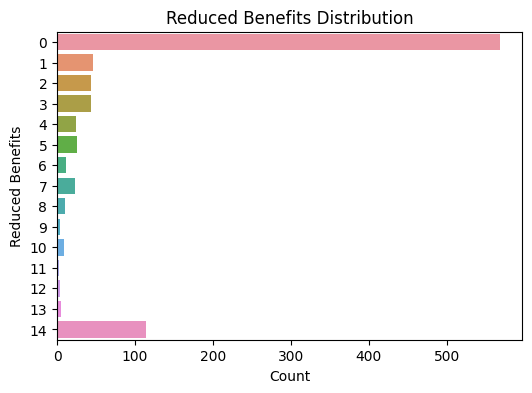

In [ ]:
#horizontal bar plot for reduced benefits
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='reduced')
plt.title('Reduced Benefits Distribution')
plt.xlabel('Count')
plt.ylabel('Reduced Benefits')
plt.show()

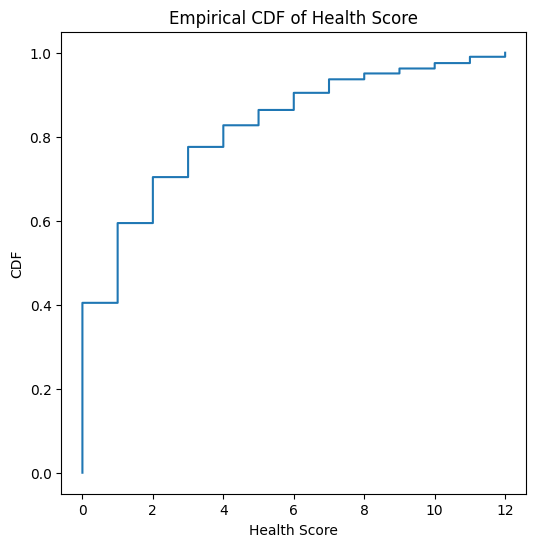

In [ ]:
#ECDF for healthscore
plt.figure(figsize=(6, 6))
x = np.sort(df['health'])
y = np.arange(1, len(x) + 1) / len(x)
plt.step(x, y)
plt.title('Empirical CDF of Health Score')
plt.xlabel('Health Score')
plt.ylabel('CDF')
plt.show()

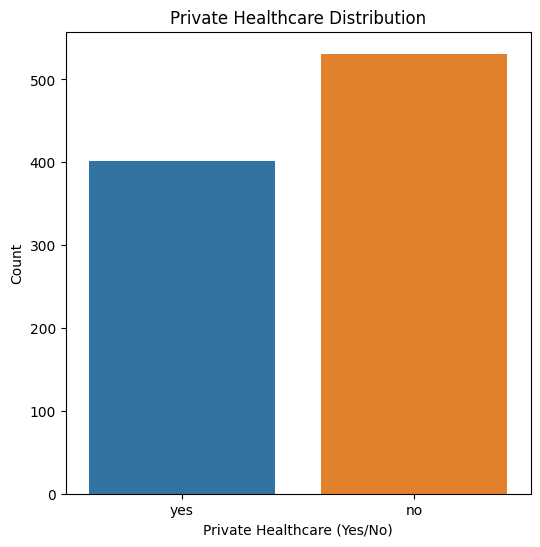

In [ ]:
#box plot for private health care
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='private')
plt.title('Private Healthcare Distribution')
plt.xlabel('Private Healthcare (Yes/No)')
plt.ylabel('Count')
plt.show()

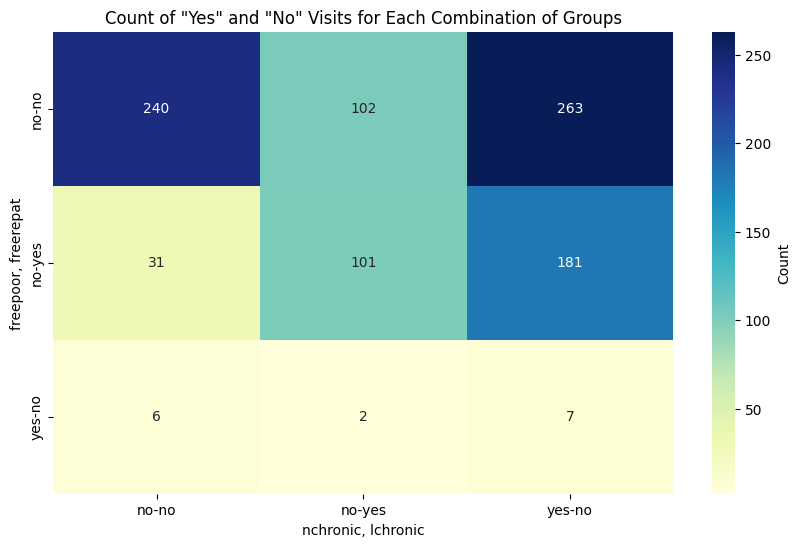

In [ ]:
#pivot table to get the count of "Yes" and "No" visits for 'freepoor', 'freerepat', 'nchronic', 'lchronic'
pivot_table = df.pivot_table(index=['freepoor', 'freerepat'],
                            columns=['nchronic', 'lchronic'],
                            values='visits',
                            aggfunc='count',
                            fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Count of "Yes" and "No" Visits for Each Combination of Groups')
plt.xlabel('nchronic, lchronic')
plt.ylabel('freepoor, freerepat')
plt.show()